In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [161]:
df = pd.read_csv('FIFA_World_Cup.csv').dropna()

In [162]:
df.shape

(850, 21)

In [163]:
df.columns

Index(['Unnamed: 0', 'Year', 'Datetime', 'Stage', 'Stadium', 'City',
       'Home.Team.Name', 'Home.Team.Goals', 'Away.Team.Goals',
       'Away.Team.Name', 'Win.conditions', 'Attendance',
       'Half.time.Home.Goals', 'Half.time.Away.Goals', 'Referee',
       'Assistant.1', 'Assistant.2', 'RoundID', 'MatchID',
       'Home.Team.Initials', 'Away.Team.Initials'],
      dtype='object')

In [164]:
df.head

<bound method NDFrame.head of      Unnamed: 0  Year              Datetime                     Stage  \
0             1  1930  13 Jul 1930 - 15:00                    Group 1   
1             2  1930  13 Jul 1930 - 15:00                    Group 4   
2             3  1930  14 Jul 1930 - 12:45                    Group 2   
3             4  1930  14 Jul 1930 - 14:50                    Group 3   
4             5  1930  15 Jul 1930 - 16:00                    Group 1   
..          ...   ...                   ...                       ...   
845         848  2014  05 Jul 2014 - 17:00             Quarter-finals   
846         849  2014  08 Jul 2014 - 17:00                Semi-finals   
847         850  2014  09 Jul 2014 - 17:00                Semi-finals   
848         851  2014  12 Jul 2014 - 17:00   Play-off for third place   
849         852  2014  13 Jul 2014 - 16:00                      Final   

                 Stadium             City Home.Team.Name  Home.Team.Goals  \
0               

In [165]:
#видаляємо усі незначні дані та додаємо стовпець з переможцем
df['result'] = df.apply(lambda row: 0 if row['Home.Team.Goals'] > row['Away.Team.Goals'] else 1, axis=1).astype(int)
df = df.drop(['Home.Team.Goals', 'Away.Team.Goals', 'Half.time.Home.Goals', 'Half.time.Away.Goals', 'Referee',
       'Assistant.1', 'Assistant.2', 'RoundID', 'MatchID',
       'Home.Team.Initials', 'Away.Team.Initials', 'Attendance', 'Win.conditions'], axis=1)

In [166]:
df.columns

Index(['Unnamed: 0', 'Year', 'Datetime', 'Stage', 'Stadium', 'City',
       'Home.Team.Name', 'Away.Team.Name', 'result'],
      dtype='object')

In [167]:

# Вибірка ознак та цільової змінної
features = ['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home.Team.Name', 'Away.Team.Name']
target = ['result']

<AxesSubplot:>

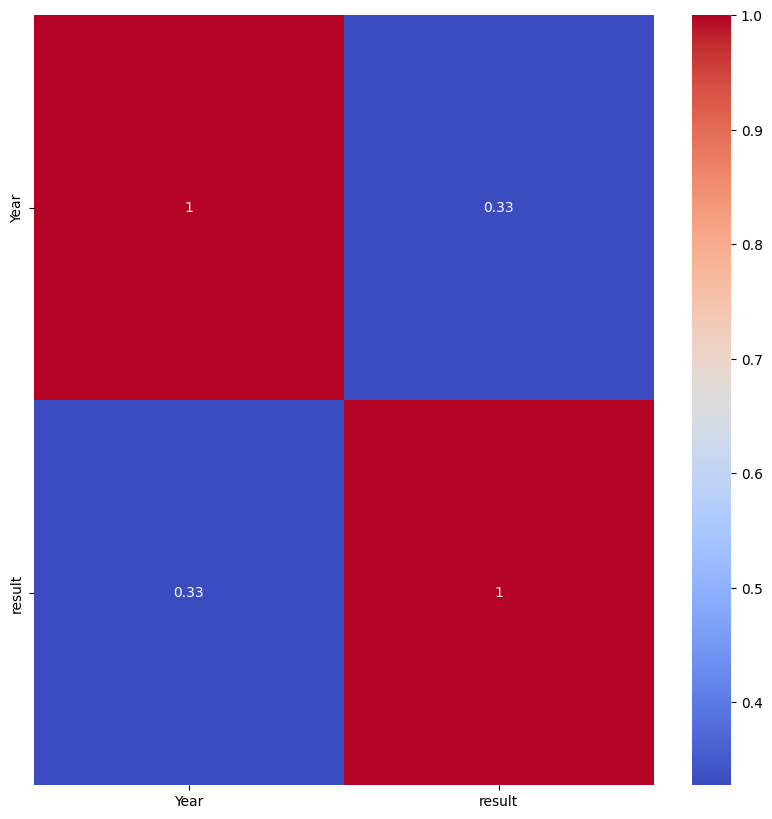

In [168]:
# Побудова heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df[features + target].corr(), annot=True, cmap='coolwarm')

array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

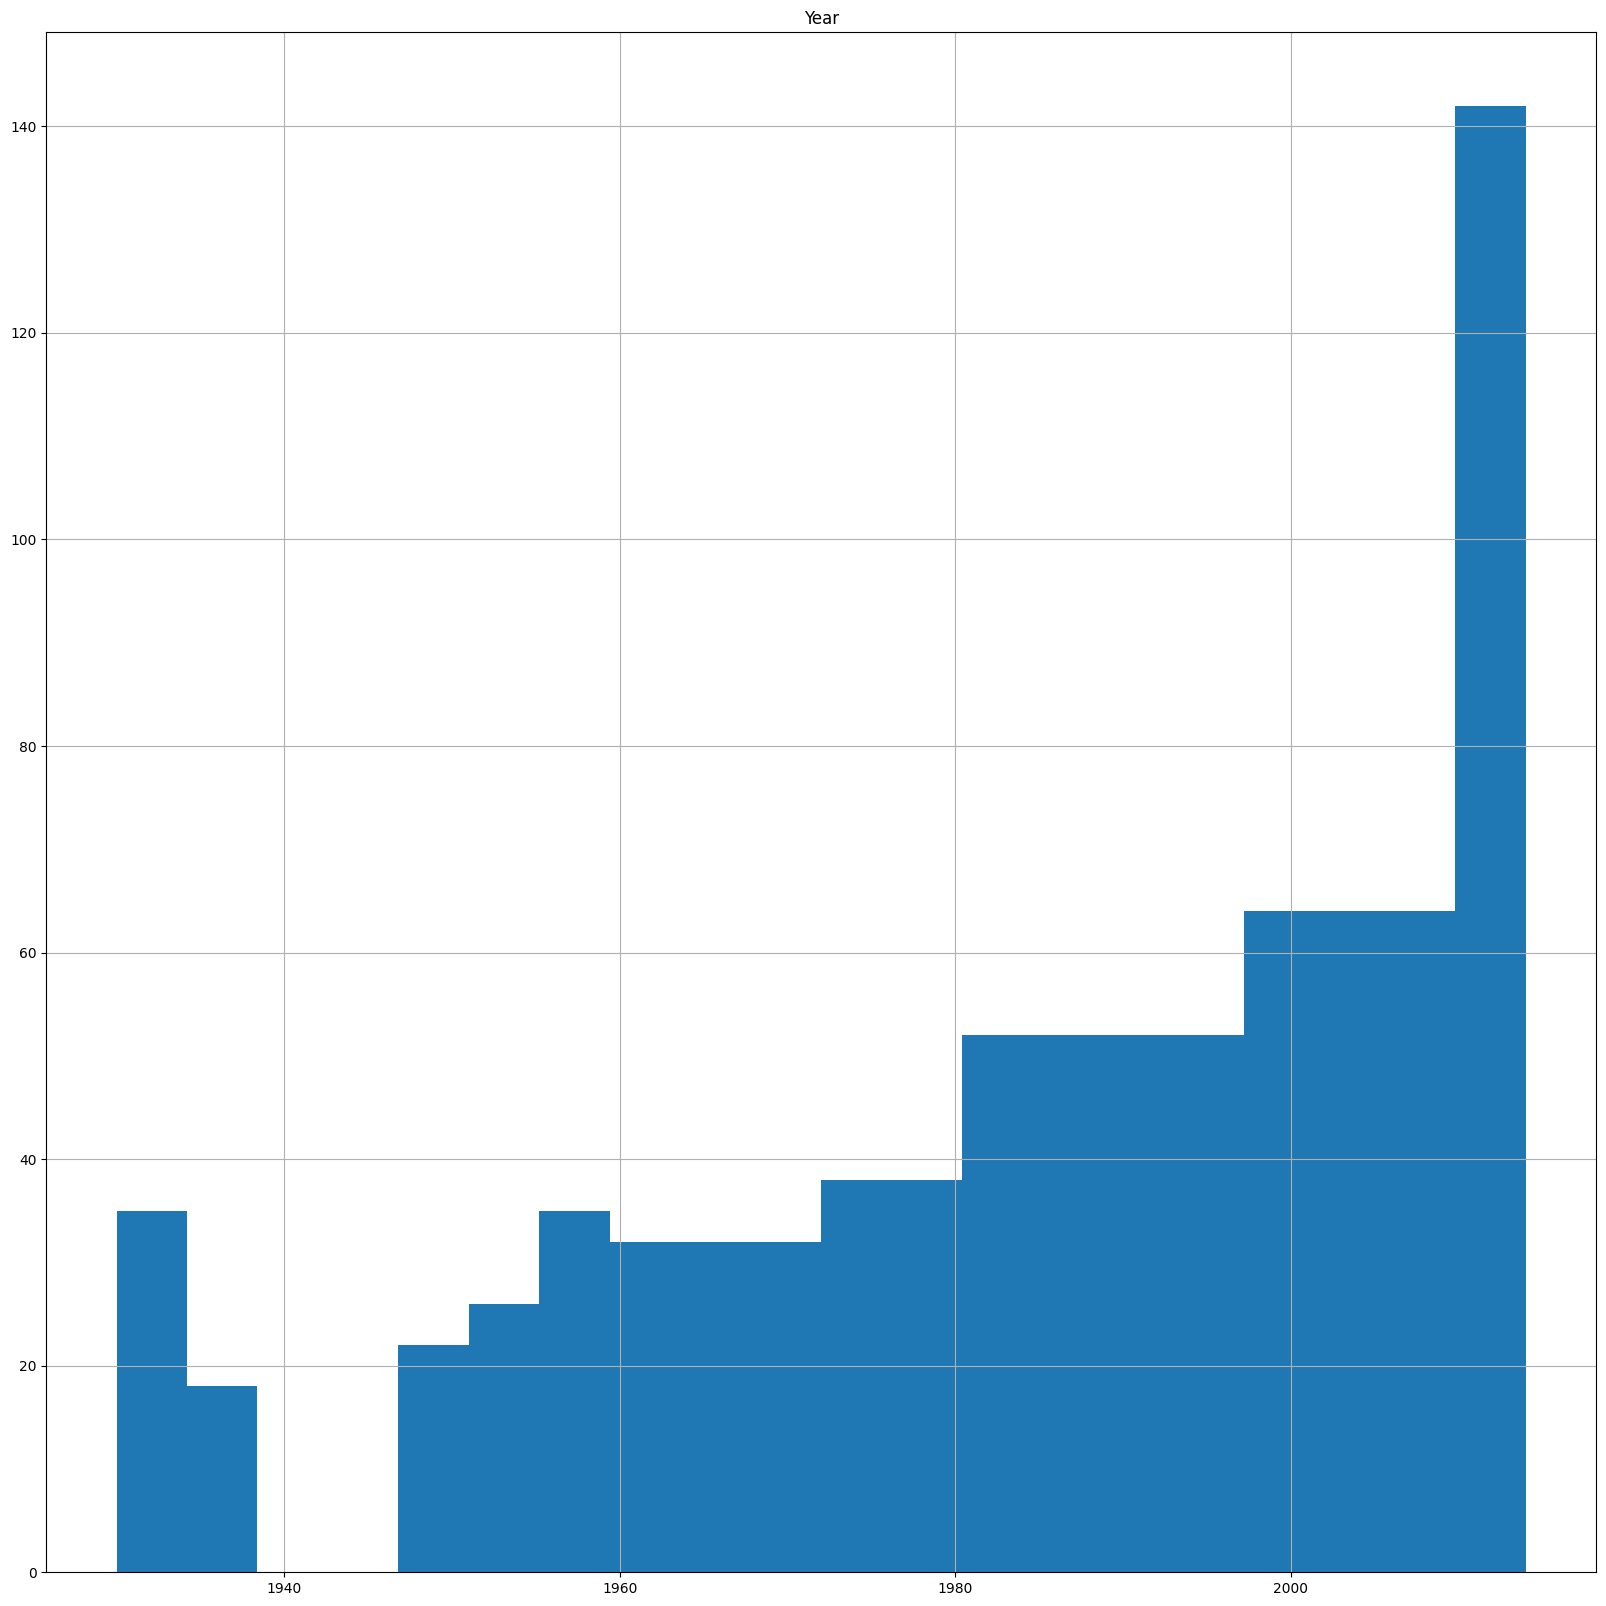

In [169]:
# Побудова гістограм розподілу ознак
df[features].hist(figsize=(20, 20), bins=20)

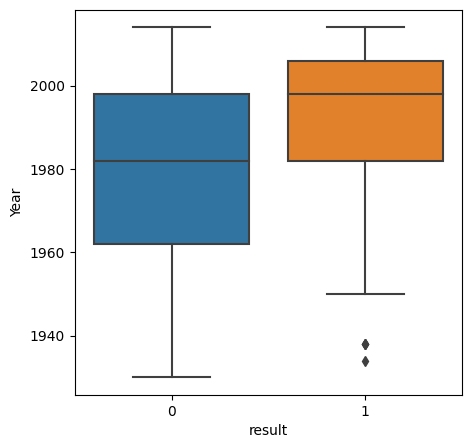

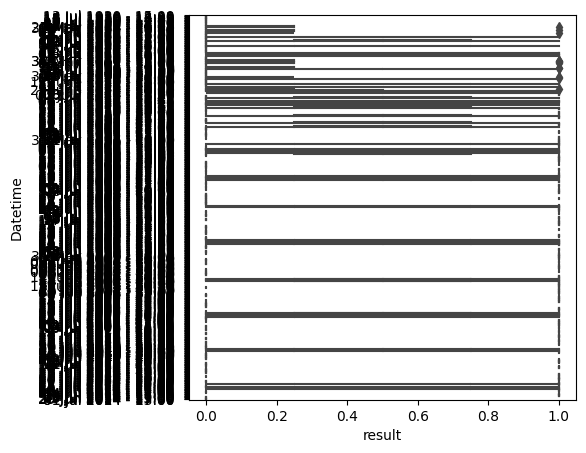

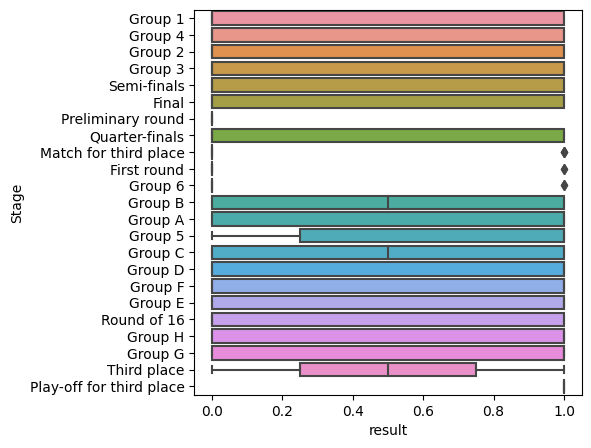

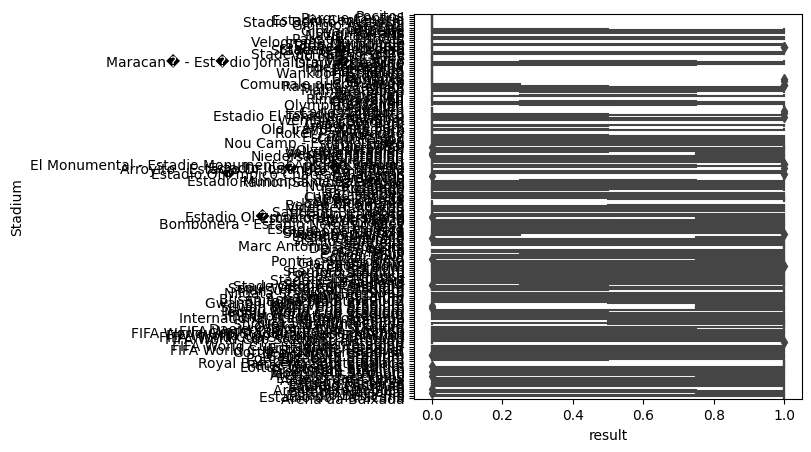

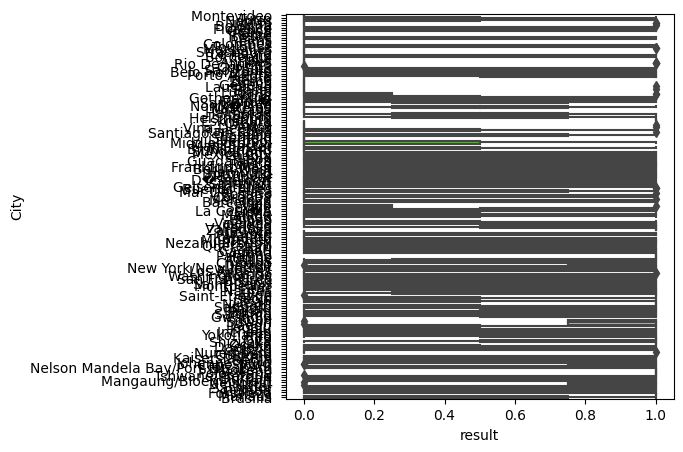

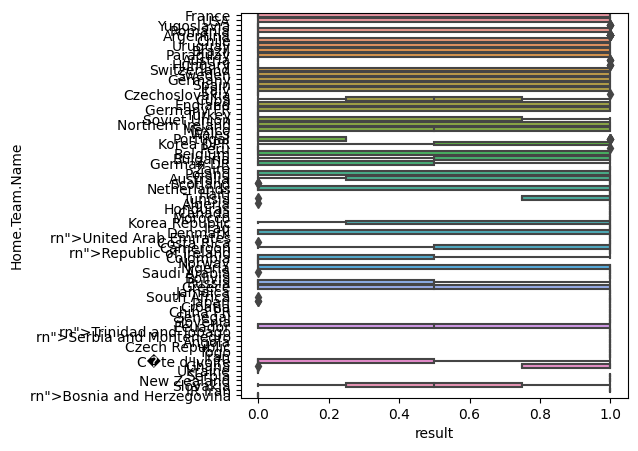

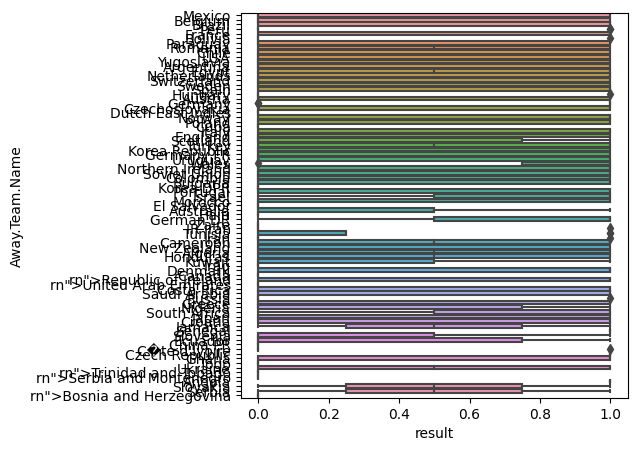

In [170]:
# Побудова boxplot-ів ознак відносно цільової змінної
for feature in features:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=target[0], y=feature, data=df)

In [171]:
df = df.apply(lambda x: pd.factorize(x)[0] + 1 if x.dtype == 'object' else x)

In [172]:
# Розділення датасету на тренувальну та тестову вибірки



X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2)


dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=10, max_features='auto')
rf.fit(X_train, y_train)

# Вивід sklearn.metrics.classification_report
print(sklearn.metrics.classification_report(y_test, dtc.predict(X_test)))
print(sklearn.metrics.classification_report(y_test, ada.predict(X_test)))
print(sklearn.metrics.classification_report(y_test, rf.predict(X_test)))

# Вивід sklearn.metrics.confusion_matrix
print(sklearn.metrics.confusion_matrix(y_test, dtc.predict(X_test)))
print(sklearn.metrics.confusion_matrix(y_test, ada.predict(X_test)))
print(sklearn.metrics.confusion_matrix(y_test, rf.predict(X_test)))

C:\Users\dmitr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\dmitr\AppData\Local\Temp\ipykernel_17400\3927082497.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       0.68      0.74      0.71        90
           1       0.68      0.61      0.64        80

    accuracy                           0.68       170
   macro avg       0.68      0.68      0.68       170
weighted avg       0.68      0.68      0.68       170

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        90
           1       0.71      0.55      0.62        80

    accuracy                           0.68       170
   macro avg       0.69      0.68      0.67       170
weighted avg       0.69      0.68      0.68       170

              precision    recall  f1-score   support

           0       0.65      0.81      0.72        90
           1       0.71      0.51      0.59        80

    accuracy                           0.67       170
   macro avg       0.68      0.66      0.66       170
weighted avg       0.68      0.67      0.66       170

[[67 23]
 [31 49]]


In [173]:
# Навчання класифікатора kNN з оптимальними параметрами
knn = KNeighborsClassifier(n_neighbors=5)
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(knn, param_grid_knn, refit=True)
grid_knn.fit(X_train, y_train)

# Навчання класифікатора SVM з оптимальними параметрами
svm = SVC(kernel='linear')
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
grid_svm = GridSearchCV(svm, param_grid_svm, refit=True)
grid_svm.fit(X_train, y_train)

print(sklearn.metrics.classification_report(y_test, grid_knn.predict(X_test)))
print(sklearn.metrics.classification_report(y_test, grid_svm.predict(X_test)))
print(sklearn.metrics.confusion_matrix(y_test, grid_knn.predict(X_test)))
print(sklearn.metrics.confusion_matrix(y_test, grid_svm.predict(X_test)))

C:\Users\dmitr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\dmitr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\dmitr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

KeyboardInterrupt: 